In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#%matplotlib inline

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [2]:
data = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
data.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
data.tail(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.shape

(5572, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 108.9+ KB


In [8]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


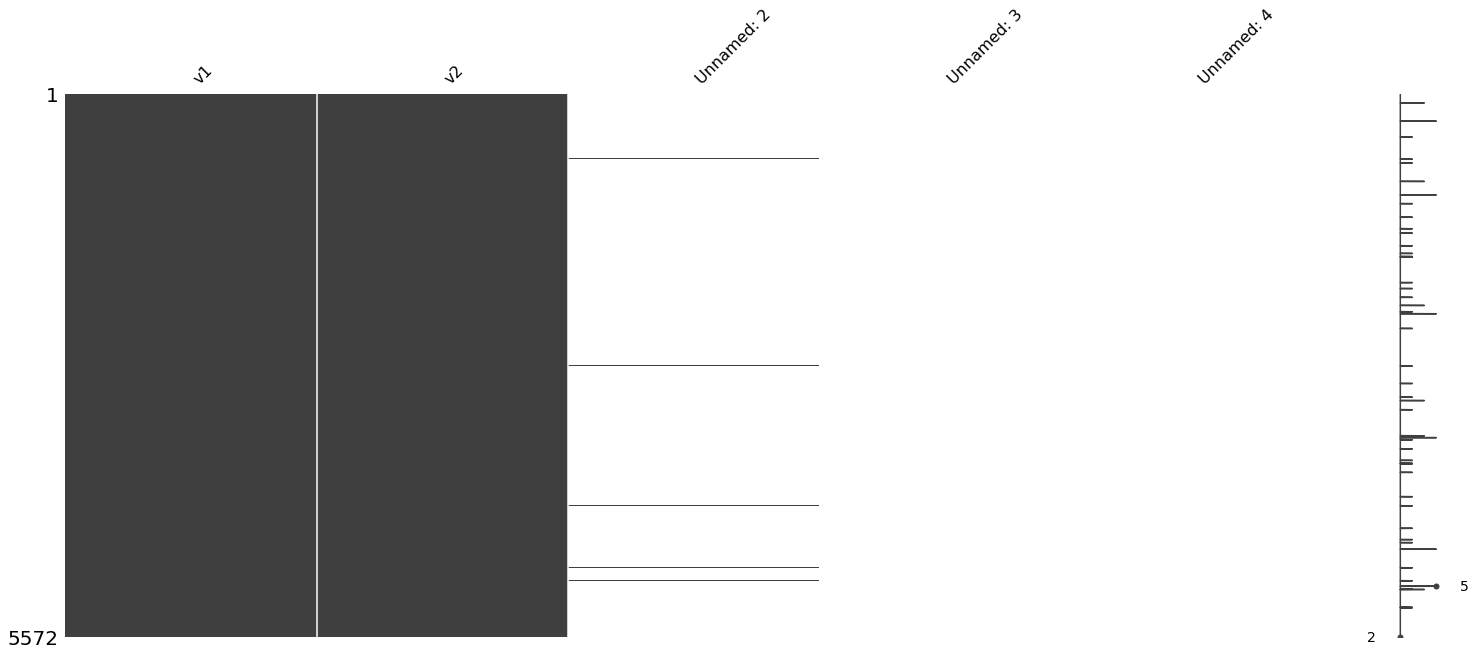

In [9]:
ms.matrix(data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 108.9+ KB


In [11]:
data.drop(['Unnamed: 2'],axis=1,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(4)
memory usage: 87.1+ KB


In [13]:
data.drop(['Unnamed: 3'],axis=1,inplace=True)

In [14]:
data.drop(['Unnamed: 4'],axis=1,inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 43.6+ KB


In [16]:
import string
def text_preprocess(cols):
    text=cols[0]
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in  stopwords.words('english')]
    return " ".join(text)


In [17]:
data['v2'] = data[['v2']].apply(text_preprocess,axis=1)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer("english")
message_mat = vectorizer.fit_transform(data['v2'])
message_mat

<5572x9376 sparse matrix of type '<class 'numpy.float64'>'
	with 47254 stored elements in Compressed Sparse Row format>

In [19]:
pip install nltk.corpus

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nltk.corpus (from versions: none)
ERROR: No matching distribution found for nltk.corpus


In [20]:
data['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [21]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [22]:
spam = pd.get_dummies(data['v1'],drop_first=3)
spam.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [23]:
old_data = data.copy()
data.drop(['v1'],axis=1,inplace=True)
data.head()

,v2
0,Go jurong point crazy Available bugis n great ...
1,Ok lar Joking wif u oni
2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say early hor U c already say
4,Nah dont think goes usf lives around though


In [24]:
data = pd.concat([data,spam],axis=1)

In [38]:
from sklearn.model_selection import train_test_split

message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_mat, 
                                                    data['spam'], test_size=0.30, 
                                                    random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(message_train, spam_nospam_train)
pred = Spam_model.predict(message_test)
accuracy_score(spam_nospam_test,pred)

0.9503588516746412

In [33]:
from sklearn.externals import joblib

joblib.dump(Spam_model,'spam.pkl')

['spam.pkl']

In [32]:
from sklearn.externals import joblib
joblib.dump(Spam_model,'spam.pkl')


['spam.pkl']